# Praktikum Data Mining II Week 4 Teks Mining Nomor 1 dan 2

Amalika Ari Anindya (164221029) Kelas SD-A2

# 1. Lakukan seluruh percobaan pada modul ini dan berikan analisis yang kalian temukan

# NLTK

In [1]:
import nltk
# nltk.download('all')

In [2]:
text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

## Tokenize

Tokenisasi merupakan langkah awal dalam pemrosesan teks, langkah ini mengubah sebuah teks menjadi list yang berisi elemen berupa setiap kata dari teks tersebut.

Untuk melakukan tokenisasi, perintah string.split() dapat dilakukan, atau menggunakan NLTK

In [3]:
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [4]:
['In', 'Brazil', 'they', 'drive', 'on', 'the', 'right hand', 'side', 'of', 'the', 'road', '.', 'Brazil', 'has', 'a', 'large', 'coastline', 'on', 'the', 'eastern', 'side', 'of', 'South', 'America']

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

Untuk mencari frekuensi kata, dapat menggunakan fungsi FreqDist dari NLTK

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

Atau, dengan menggunakan method most_common untuk mencari beberapa kata dengan frekuensi tertinggi dalam korpus

In [6]:
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

Frekuensi kata ini juga dapat divisualisasikan menggunakan barplot

<Axes: xlabel='Key'>

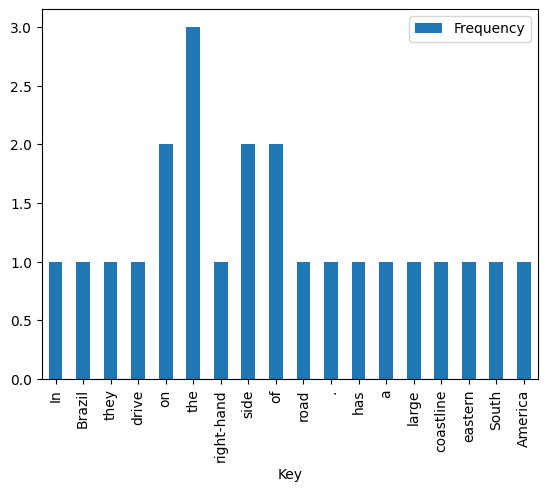

In [7]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

Stopwords merupakan kata yang paling banyak muncul dalam sebuah teks. Biasanya tidak memiliki makna tertentu, contoh “the” “an” “a” “on” “is”

In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))
text = "Christiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())

print(text1)

stopwords = [x for x in text1 if x not in a]
print(stopwords)

['christiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['christiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


## Stemming

Stemming merupakan salah satu langkah pra pemrosesan teks. Yaitu mengubah sebuah kata menjadi bentuk dasarnya, misalkan: “Waiting” menjadi “Wait”, dan “Mengubah” menjadi “Ubah”

Contoh Stemming di NLTK

In [9]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying that without crYing'
print('Sentence: ', S)

Sentence:  presumably I would like to MultiPly my provision, saying that without crYing


In [10]:
stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']

for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ': ', ' '.join(st.stem(s) for s in S.split()))

Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri
SnowBall :  presum i would like to multipli my provision, say that without cri


Perhatikan, kita tidak melakukan case normalization (lowercase)

Hasil stemming bisa tidak bermakna

## Lemmatization

Proses lemmatization merupakan proses yang lebih kompleks dari stemming, karena meliputi perubahan bentuk kata ke bentuk dasarnya. Contoh: “going”, “went”, “gone” memiliki output yang sama ketika dilakukan lemmatisasi yakni “go”

Dalam python, lemmatisasi Bahasa Inggris dapat dilakukan menggunakan beberapa algoritma, yakni WordNet Lemmatizer, SpaCy Lemmatizer, TextBlob, dan Stanford CoreNLP

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


Dalam NLTK, Pos Tagging dapat digunakan.

Contoh POS tags dengan NLTK (Bahasa Inggris)

In [12]:
from nltk import pos_tag
S = "I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too"

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


# TextBlob

## Tokenisasi

In [13]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

# Tokenisasi kata
print(TextBlob(T).words)

# Tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


## Stemming dan Lemmatization

In [14]:
from textblob import Word

# Stemming
print("Stem: ", Word('running').stem())

# Lemmatizer
print("Lemmatize: ", Word('went').lemmatize('v'))

Stem:  run
Lemmatize:  go


Default Noun, plural akan menjadi singular dari akar katanya. Juga akan case sensitive.

## Pos Tagging

In [15]:
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

# Sastrawi

Untuk Bahasa Indonesia terdapat library dengan nama PySastrawi

## Tokenize

In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis & murah.


## Stemming dan Lemma

In [17]:
# Lemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


Ada beberapa hal yang berbeda antara Sastrawi dan modul-modul di atas. Apa sajakah?

# Wordcloud

Wordcloud merupakan salah satu cara visualisasi deskriptif pada data teks, sifatnya mirip dengan barplot frekuensi namun semakin besar frekuensi kata tersebut, semakin besar ukuran kata tersebut dalam wordcloud

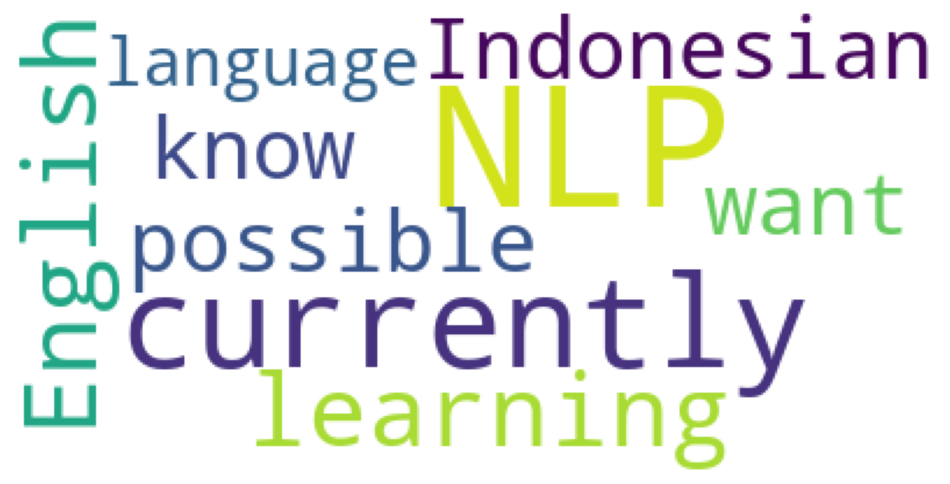

In [18]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(S)

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
plt.show()

# Clustering

Clustering merupakan metode pengelompokan data yang tidak memiliki label.

Clustering dibagi menjadi tiga yaitu Hard Clustering, Hierarchical Clustering, Soft/Fuzzy Clustering

## Hard Clustering

Metode Clustering Hard Clustering merupakan pengelompokan data dimana data termasuk pada kelompok tertentu atau tidak. Beberapa metode tersebut adalah Kmeans, Kmeans++, DB Scan.

### Kmeans

In [19]:
import pickle
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Load data
src_name = "20newsgroup.pckl"
src_path = os.path.join("", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)
    
docs = [doc for doc in data.data]
label = data.target

In [20]:
def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) # menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

In [21]:
docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print('DONE!')

DONE!


In [22]:
docs_clear

['i want get car alarm i thinking getting ungo box   does anyone knowledge experience alarms   how price ranges different models   are good car alarms   please email responces   cak3   ns3 lehigh edu',
 'i hear question asked radio news update case     they talking ongoing trial audio clips     immediately defense attorney asked question     objection     heard background   the clip ended point i n t know objection upheld   i ca n t imagine nc     bad   this i n t hear audio clip heard reported number times news stories trial   now   purpose   thing stretching   i think something like   coming   if somebody else remebers better i second point   feel free clarify   frank                                                                           frank r  chloupek chloupek   ohstpy mps ohio state edu department physics     the   ohio state university   not ohio state university  ',
 'quoting jeffrey j  nucciarone  s   nucci   microwave gsfc nasa gov   article   c4g8hv cs4   skates gsfc nas

Representasi vektor dengan VSM-TFIDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)

k = 3
seed = 99 # Sembarang nilai untuk random generator, set seed
km = cluster.KMeans (n_clusters=k, init='random', max_iter=300, random_state=seed)
km.fit(X)

# Hasil clustering
C_km = km.predict(X)
C_km[:10]

(1653, 10697)


C:\Users\kevir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 0, 0, 2, 0, 0, 0, 0])

### Kmeans++
http://skicit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [24]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(X)

C_kmpp = kmPP.predict(X)
C_kmpp[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### DB Scan

http://skicit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [25]:
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)

C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# Evaluasi

Evaluasi Clustering Evaluasi clustering dapat dibagi menjadi 2 kelompok: Eksternal dan Internal. 

Eksternal: menghitung seberapa baik sebuah cluster dibandingkan dengan nground truth. 

Internal: menghitung seberapa baik cluster yang terbentuk berdasarkan intra-cluster similarity dan inter-cluster similarity

Salah satu contoh Evaluasi Internal yaitu Silhouette coefficient yang menghitung kemiripan data point dengan cluster tempat data point tsb berada dibandingkan dengan cluster tetangga. Range nilai [-1, +1]. Semakin tinggi nilainya menunjukkan semakin baik cluster yang terbentuk.

In [26]:
from sklearn.metrics import silhouette_score as siluet

C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X,res), end=', ')
    
# Silhouette coefficient hanya cocok untuk k-means

0.01692586364386226, 0.018589475312822543, -0.23697524589624636, 

Salah satu evaluasi eksternal yaitu Purity yang menghitung jumlah data point yang benar dalam suatu cluster. Untuk menggunakan evaluasi ini, membutuhkan label data dari ground truth.

In [27]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.25348321373877436, 0.06952188099464576, 0.0015549989772357536, 

## Evaluasi eksternal menggunakan NMI

In [28]:
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label,res), end=', ')

0.31440085156926334, 0.10920145484701148, 0.002704356633566744, 

# 2. Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK, TextBlob dan Sastrawi dan berikan contohnya.

In [3]:
teks_inggris = "Joanna Paresi was the last one left – the last living person in a family who had been market traders for hundreds of years. She was born in a village at the bottom of high mountains, and she had lived there all her life. At the top of the mountains, the stone fruit grew. In autumn, the fruit fell down the mountains. Most of the stone fruit got lost and no one could find them again. But some fruit fell into a small valley. Joanna's family were the only people who knew about the valley. When the stone fruit fell from the trees, they were black and hard. It took four long months for them to become ripe. They turned from black to grey and, finally, to silver. Then people could enjoy the sweet, sun-coloured fruit inside."
teks_inggris

"Joanna Paresi was the last one left – the last living person in a family who had been market traders for hundreds of years. She was born in a village at the bottom of high mountains, and she had lived there all her life. At the top of the mountains, the stone fruit grew. In autumn, the fruit fell down the mountains. Most of the stone fruit got lost and no one could find them again. But some fruit fell into a small valley. Joanna's family were the only people who knew about the valley. When the stone fruit fell from the trees, they were black and hard. It took four long months for them to become ripe. They turned from black to grey and, finally, to silver. Then people could enjoy the sweet, sun-coloured fruit inside."

In [4]:
teks_indonesia = "Di sebuah perkampungan di kaki Gunung Tinjau, ada sepuluh orang bersaudara yang biasa disebut Bujang Sembilan. Si sulung bernama Kukuban dan si bungsu bernama Sani. Mereka mempunyai seorang paman bernama Datuk Limbatang. Datuk Limbatang pun mempunyai seorang putra bernama Giran. Suatu hari, Datuk Limbatang berkunjung ke rumah Bujang Sambilan dan di saat itulah Sani dan Girang menyadari bahwa mereka saling menaruh hati. Seiring berjalannya waktu, ketika musim panen tiba kampung tersebut mengadakan adu silat."
teks_indonesia

'Di sebuah perkampungan di kaki Gunung Tinjau, ada sepuluh orang bersaudara yang biasa disebut Bujang Sembilan. Si sulung bernama Kukuban dan si bungsu bernama Sani. Mereka mempunyai seorang paman bernama Datuk Limbatang. Datuk Limbatang pun mempunyai seorang putra bernama Giran. Suatu hari, Datuk Limbatang berkunjung ke rumah Bujang Sambilan dan di saat itulah Sani dan Girang menyadari bahwa mereka saling menaruh hati. Seiring berjalannya waktu, ketika musim panen tiba kampung tersebut mengadakan adu silat.'

## Menggunakan NLTK

### Inggris

In [7]:
# Tokenize

from nltk.tokenize import word_tokenize
hasil_token = word_tokenize(teks_inggris)
hasil_token

['Joanna',
 'Paresi',
 'was',
 'the',
 'last',
 'one',
 'left',
 '–',
 'the',
 'last',
 'living',
 'person',
 'in',
 'a',
 'family',
 'who',
 'had',
 'been',
 'market',
 'traders',
 'for',
 'hundreds',
 'of',
 'years',
 '.',
 'She',
 'was',
 'born',
 'in',
 'a',
 'village',
 'at',
 'the',
 'bottom',
 'of',
 'high',
 'mountains',
 ',',
 'and',
 'she',
 'had',
 'lived',
 'there',
 'all',
 'her',
 'life',
 '.',
 'At',
 'the',
 'top',
 'of',
 'the',
 'mountains',
 ',',
 'the',
 'stone',
 'fruit',
 'grew',
 '.',
 'In',
 'autumn',
 ',',
 'the',
 'fruit',
 'fell',
 'down',
 'the',
 'mountains',
 '.',
 'Most',
 'of',
 'the',
 'stone',
 'fruit',
 'got',
 'lost',
 'and',
 'no',
 'one',
 'could',
 'find',
 'them',
 'again',
 '.',
 'But',
 'some',
 'fruit',
 'fell',
 'into',
 'a',
 'small',
 'valley',
 '.',
 'Joanna',
 "'s",
 'family',
 'were',
 'the',
 'only',
 'people',
 'who',
 'knew',
 'about',
 'the',
 'valley',
 '.',
 'When',
 'the',
 'stone',
 'fruit',
 'fell',
 'from',
 'the',
 'trees',
 '

In [13]:
# Stopwords

from nltk.corpus import stopwords

a = set(stopwords.words('english'))
text1 = word_tokenize(teks_inggris.lower())
hasil_sw = [x for x in text1 if x not in a]
print(hasil_sw)

['joanna', 'paresi', 'last', 'one', 'left', '–', 'last', 'living', 'person', 'family', 'market', 'traders', 'hundreds', 'years', '.', 'born', 'village', 'bottom', 'high', 'mountains', ',', 'lived', 'life', '.', 'top', 'mountains', ',', 'stone', 'fruit', 'grew', '.', 'autumn', ',', 'fruit', 'fell', 'mountains', '.', 'stone', 'fruit', 'got', 'lost', 'one', 'could', 'find', '.', 'fruit', 'fell', 'small', 'valley', '.', 'joanna', "'s", 'family', 'people', 'knew', 'valley', '.', 'stone', 'fruit', 'fell', 'trees', ',', 'black', 'hard', '.', 'took', 'four', 'long', 'months', 'become', 'ripe', '.', 'turned', 'black', 'grey', ',', 'finally', ',', 'silver', '.', 'people', 'could', 'enjoy', 'sweet', ',', 'sun-coloured', 'fruit', 'inside', '.']


In [18]:
# Stemming

from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']

for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ': ', ' '.join(st.stem(s) for s in hasil_sw), '\n')

Lancaster :  joann pares last on left – last liv person famy market trad hundr year . born vil bottom high mountain , liv lif . top mountain , ston fruit grew . autumn , fruit fel mountain . ston fruit got lost on could find . fruit fel smal valley . joann 's famy peopl knew valley . ston fruit fel tre , black hard . took four long month becom rip . turn black grey , fin , silv . peopl could enjoy sweet , sun-coloured fruit insid . 

Porter :  joanna paresi last one left – last live person famili market trader hundr year . born villag bottom high mountain , live life . top mountain , stone fruit grew . autumn , fruit fell mountain . stone fruit got lost one could find . fruit fell small valley . joanna 's famili peopl knew valley . stone fruit fell tree , black hard . took four long month becom ripe . turn black grey , final , silver . peopl could enjoy sweet , sun-colour fruit insid . 

SnowBall :  joanna paresi last one left – last live person famili market trader hundr year . born v

In [22]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in hasil_sw]
print(lemmatized_words)

['joanna', 'paresi', 'last', 'one', 'left', '–', 'last', 'living', 'person', 'family', 'market', 'trader', 'hundred', 'year', '.', 'born', 'village', 'bottom', 'high', 'mountain', ',', 'lived', 'life', '.', 'top', 'mountain', ',', 'stone', 'fruit', 'grew', '.', 'autumn', ',', 'fruit', 'fell', 'mountain', '.', 'stone', 'fruit', 'got', 'lost', 'one', 'could', 'find', '.', 'fruit', 'fell', 'small', 'valley', '.', 'joanna', "'s", 'family', 'people', 'knew', 'valley', '.', 'stone', 'fruit', 'fell', 'tree', ',', 'black', 'hard', '.', 'took', 'four', 'long', 'month', 'become', 'ripe', '.', 'turned', 'black', 'grey', ',', 'finally', ',', 'silver', '.', 'people', 'could', 'enjoy', 'sweet', ',', 'sun-coloured', 'fruit', 'inside', '.']


### Indonesia

In [34]:
# Tokenize

from nltk.tokenize import word_tokenize
hasil_token = word_tokenize(teks_indonesia)
hasil_token

['Di',
 'sebuah',
 'perkampungan',
 'di',
 'kaki',
 'Gunung',
 'Tinjau',
 ',',
 'ada',
 'sepuluh',
 'orang',
 'bersaudara',
 'yang',
 'biasa',
 'disebut',
 'Bujang',
 'Sembilan',
 '.',
 'Si',
 'sulung',
 'bernama',
 'Kukuban',
 'dan',
 'si',
 'bungsu',
 'bernama',
 'Sani',
 '.',
 'Mereka',
 'mempunyai',
 'seorang',
 'paman',
 'bernama',
 'Datuk',
 'Limbatang',
 '.',
 'Datuk',
 'Limbatang',
 'pun',
 'mempunyai',
 'seorang',
 'putra',
 'bernama',
 'Giran',
 '.',
 'Suatu',
 'hari',
 ',',
 'Datuk',
 'Limbatang',
 'berkunjung',
 'ke',
 'rumah',
 'Bujang',
 'Sambilan',
 'dan',
 'di',
 'saat',
 'itulah',
 'Sani',
 'dan',
 'Girang',
 'menyadari',
 'bahwa',
 'mereka',
 'saling',
 'menaruh',
 'hati',
 '.',
 'Seiring',
 'berjalannya',
 'waktu',
 ',',
 'ketika',
 'musim',
 'panen',
 'tiba',
 'kampung',
 'tersebut',
 'mengadakan',
 'adu',
 'silat',
 '.']

In [36]:
from nltk.corpus import stopwords
from nltk.data import find

try:
    # Check if the stopwords dataset is available
    find('corpora/stopwords.zip')
except:
    print("Stopwords dataset not found. Downloading...")
    from nltk import download
    download('stopwords')

# Load the stopwords corpus
stop_words = stopwords.words('indonesian')

# Function to remove stopwords from a list of words
def remove_stopwords(words, stopwords):
    return [word for word in words if word not in stopwords]

# Example usage
text = "Ini adalah contoh kalimat yang mengandung beberapa stopwords."
words = text.lower().split()  # Tokenize the text
filtered_words = remove_stopwords(words, stop_words)
print(filtered_words)

['contoh', 'kalimat', 'mengandung', 'stopwords.']


In [37]:
# Stopwords

from nltk.corpus import stopwords

text1 = word_tokenize(teks_indonesia.lower())
filtered_words = remove_stopwords(text1, stop_words)
print(filtered_words)

['perkampungan', 'kaki', 'gunung', 'tinjau', ',', 'sepuluh', 'orang', 'bersaudara', 'bujang', 'sembilan', '.', 'si', 'sulung', 'bernama', 'kukuban', 'si', 'bungsu', 'bernama', 'sani', '.', 'paman', 'bernama', 'datuk', 'limbatang', '.', 'datuk', 'limbatang', 'putra', 'bernama', 'giran', '.', ',', 'datuk', 'limbatang', 'berkunjung', 'rumah', 'bujang', 'sambilan', 'sani', 'girang', 'menyadari', 'menaruh', 'hati', '.', 'seiring', 'berjalannya', ',', 'musim', 'panen', 'kampung', 'mengadakan', 'adu', 'silat', '.']


#### Stemming dan Lemmatization
NLTK tidak dapat menerapkan Stemming dan Lemmatization dalam Bahasa Indonesia dan harus menggunakan Sastrawi.

## TextBlob

### Inggris

In [26]:
from textblob import TextBlob

# Tokenisasi kata
tb_token = TextBlob(teks_inggris).words
print(tb_token)

['Joanna', 'Paresi', 'was', 'the', 'last', 'one', 'left', '–', 'the', 'last', 'living', 'person', 'in', 'a', 'family', 'who', 'had', 'been', 'market', 'traders', 'for', 'hundreds', 'of', 'years', 'She', 'was', 'born', 'in', 'a', 'village', 'at', 'the', 'bottom', 'of', 'high', 'mountains', 'and', 'she', 'had', 'lived', 'there', 'all', 'her', 'life', 'At', 'the', 'top', 'of', 'the', 'mountains', 'the', 'stone', 'fruit', 'grew', 'In', 'autumn', 'the', 'fruit', 'fell', 'down', 'the', 'mountains', 'Most', 'of', 'the', 'stone', 'fruit', 'got', 'lost', 'and', 'no', 'one', 'could', 'find', 'them', 'again', 'But', 'some', 'fruit', 'fell', 'into', 'a', 'small', 'valley', 'Joanna', "'s", 'family', 'were', 'the', 'only', 'people', 'who', 'knew', 'about', 'the', 'valley', 'When', 'the', 'stone', 'fruit', 'fell', 'from', 'the', 'trees', 'they', 'were', 'black', 'and', 'hard', 'It', 'took', 'four', 'long', 'months', 'for', 'them', 'to', 'become', 'ripe', 'They', 'turned', 'from', 'black', 'to', 'grey

In [27]:
# Tokenisasi kalimat
sentence_tokens = TextBlob(teks_inggris).sentences
print([str(sent) for sent in sentence_tokens])

['Joanna Paresi was the last one left – the last living person in a family who had been market traders for hundreds of years.', 'She was born in a village at the bottom of high mountains, and she had lived there all her life.', 'At the top of the mountains, the stone fruit grew.', 'In autumn, the fruit fell down the mountains.', 'Most of the stone fruit got lost and no one could find them again.', 'But some fruit fell into a small valley.', "Joanna's family were the only people who knew about the valley.", 'When the stone fruit fell from the trees, they were black and hard.', 'It took four long months for them to become ripe.', 'They turned from black to grey and, finally, to silver.', 'Then people could enjoy the sweet, sun-coloured fruit inside.']


In [29]:
from textblob import Word

# Stemming
tb_token.stem()

WordList(['joanna', 'paresi', 'wa', 'the', 'last', 'one', 'left', '–', 'the', 'last', 'live', 'person', 'in', 'a', 'famili', 'who', 'had', 'been', 'market', 'trader', 'for', 'hundr', 'of', 'year', 'she', 'wa', 'born', 'in', 'a', 'villag', 'at', 'the', 'bottom', 'of', 'high', 'mountain', 'and', 'she', 'had', 'live', 'there', 'all', 'her', 'life', 'at', 'the', 'top', 'of', 'the', 'mountain', 'the', 'stone', 'fruit', 'grew', 'in', 'autumn', 'the', 'fruit', 'fell', 'down', 'the', 'mountain', 'most', 'of', 'the', 'stone', 'fruit', 'got', 'lost', 'and', 'no', 'one', 'could', 'find', 'them', 'again', 'but', 'some', 'fruit', 'fell', 'into', 'a', 'small', 'valley', 'joanna', "'s", 'famili', 'were', 'the', 'onli', 'peopl', 'who', 'knew', 'about', 'the', 'valley', 'when', 'the', 'stone', 'fruit', 'fell', 'from', 'the', 'tree', 'they', 'were', 'black', 'and', 'hard', 'it', 'took', 'four', 'long', 'month', 'for', 'them', 'to', 'becom', 'ripe', 'they', 'turn', 'from', 'black', 'to', 'grey', 'and', '

In [30]:
# Lemmatizer
tb_token.lemmatize()

WordList(['Joanna', 'Paresi', 'wa', 'the', 'last', 'one', 'left', '–', 'the', 'last', 'living', 'person', 'in', 'a', 'family', 'who', 'had', 'been', 'market', 'trader', 'for', 'hundred', 'of', 'year', 'She', 'wa', 'born', 'in', 'a', 'village', 'at', 'the', 'bottom', 'of', 'high', 'mountain', 'and', 'she', 'had', 'lived', 'there', 'all', 'her', 'life', 'At', 'the', 'top', 'of', 'the', 'mountain', 'the', 'stone', 'fruit', 'grew', 'In', 'autumn', 'the', 'fruit', 'fell', 'down', 'the', 'mountain', 'Most', 'of', 'the', 'stone', 'fruit', 'got', 'lost', 'and', 'no', 'one', 'could', 'find', 'them', 'again', 'But', 'some', 'fruit', 'fell', 'into', 'a', 'small', 'valley', 'Joanna', "'s", 'family', 'were', 'the', 'only', 'people', 'who', 'knew', 'about', 'the', 'valley', 'When', 'the', 'stone', 'fruit', 'fell', 'from', 'the', 'tree', 'they', 'were', 'black', 'and', 'hard', 'It', 'took', 'four', 'long', 'month', 'for', 'them', 'to', 'become', 'ripe', 'They', 'turned', 'from', 'black', 'to', 'grey'

### Indonesia

In [38]:
from textblob import TextBlob

# Tokenisasi kata
tb_token = TextBlob(teks_indonesia).words
print(tb_token)

['Di', 'sebuah', 'perkampungan', 'di', 'kaki', 'Gunung', 'Tinjau', 'ada', 'sepuluh', 'orang', 'bersaudara', 'yang', 'biasa', 'disebut', 'Bujang', 'Sembilan', 'Si', 'sulung', 'bernama', 'Kukuban', 'dan', 'si', 'bungsu', 'bernama', 'Sani', 'Mereka', 'mempunyai', 'seorang', 'paman', 'bernama', 'Datuk', 'Limbatang', 'Datuk', 'Limbatang', 'pun', 'mempunyai', 'seorang', 'putra', 'bernama', 'Giran', 'Suatu', 'hari', 'Datuk', 'Limbatang', 'berkunjung', 'ke', 'rumah', 'Bujang', 'Sambilan', 'dan', 'di', 'saat', 'itulah', 'Sani', 'dan', 'Girang', 'menyadari', 'bahwa', 'mereka', 'saling', 'menaruh', 'hati', 'Seiring', 'berjalannya', 'waktu', 'ketika', 'musim', 'panen', 'tiba', 'kampung', 'tersebut', 'mengadakan', 'adu', 'silat']


In [39]:
# Tokenisasi kalimat
sentence_tokens = TextBlob(teks_indonesia).sentences
print([str(sent) for sent in sentence_tokens])

['Di sebuah perkampungan di kaki Gunung Tinjau, ada sepuluh orang bersaudara yang biasa disebut Bujang Sembilan.', 'Si sulung bernama Kukuban dan si bungsu bernama Sani.', 'Mereka mempunyai seorang paman bernama Datuk Limbatang.', 'Datuk Limbatang pun mempunyai seorang putra bernama Giran.', 'Suatu hari, Datuk Limbatang berkunjung ke rumah Bujang Sambilan dan di saat itulah Sani dan Girang menyadari bahwa mereka saling menaruh hati.', 'Seiring berjalannya waktu, ketika musim panen tiba kampung tersebut mengadakan adu silat.']


Stemming dan Lemmatization tidak dapat digunakan dalam Bahasa Indonesia pada TextBlob. Jika memang ingin menggunakan TextBlob maka harus menambahkan bantuan library Sastrawi.

In [42]:
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stem the text
tbstring = ' '.join(tb_token)
stemmed_text = stemmer.stem(tbstring)
print(stemmed_text)

di buah kampung di kaki gunung tinjau ada puluh orang saudara yang biasa sebut bujang sembilan si sulung nama ban dan si bungsu nama sani mereka punya orang paman nama datuk limbatang datuk limbatang pun punya orang putra nama gir suatu hari datuk limbatang kunjung ke rumah bujang sambil dan di saat itu sani dan girang sadar bahwa mereka saling taruh hati iring jalan waktu ketika musim panen tiba kampung sebut ada adu silat


## Sastrawi

Sastrawi tidak dapat digunakan pada teks berbahasa Inggris.

In [31]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stop = stopword.remove(teks_indonesia.lower())
print(stop)

sebuah perkampungan kaki gunung tinjau, sepuluh orang bersaudara biasa disebut bujang sembilan. si sulung bernama kukuban si bungsu bernama sani. mempunyai seorang paman bernama datuk limbatang. datuk limbatang mempunyai seorang putra bernama giran. suatu hari, datuk limbatang berkunjung rumah bujang sambilan di itulah sani girang menyadari mereka saling menaruh hati. seiring berjalannya waktu, musim panen tiba kampung tersebut mengadakan adu silat.


In [32]:
# Lemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

print(stemmer.stem(stop))

buah kampung kaki gunung tinjau puluh orang saudara biasa sebut bujang sembilan si sulung nama ban si bungsu nama sani punya orang paman nama datuk limbatang datuk limbatang punya orang putra nama gir suatu hari datuk limbatang kunjung rumah bujang sambil di itu sani girang sadar mereka saling taruh hati iring jalan waktu musim panen tiba kampung sebut ada adu silat
